In [1]:
# Importing libraries

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets



In [2]:
#data loading
df=pd.read_csv("Advertising.csv")

#view first five rows
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Droping unwanted column

df=df.drop('Unnamed: 0', axis=1)

In [4]:
#view total number of rows and features
df.shape

(200, 4)

In [5]:
#check memory allocation and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#Check the null value
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Exploratory data analysis

In [7]:
# Displaying General stats
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


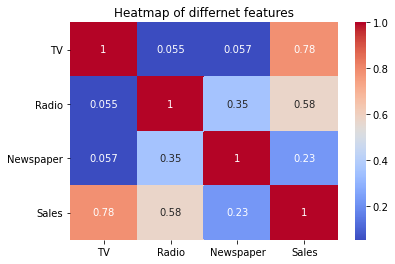

In [8]:
# Calculate the correlation matrix between all columns
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm').set(title='Heatmap of differnet features');
plt.show()

Observation
------------------

Only TV and Sales have a good co-relation with each other.


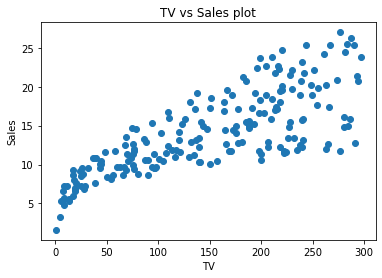

In [9]:
plt.plot(df['TV'], df['Sales'], 'o')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales plot')
plt.show()

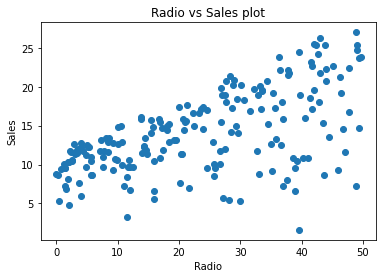

In [10]:
plt.plot(df['Radio'], df['Sales'], 'o')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales plot')
plt.show()

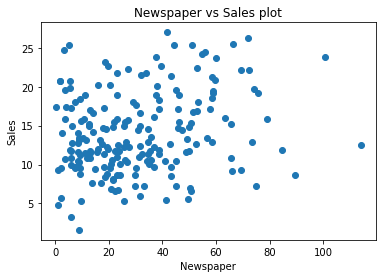

In [11]:
plt.plot(df['Newspaper'], df['Sales'], 'o')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales plot')
plt.show()


Observation
------------------
* From above three plots we can see that our TV vs Sales plot looks in a good shape.
* We can see that data distributed badly in the Newspaper vs Sales plot.


In [12]:
# Add polynomial terms for 'TV' and 'Radio'
df['TV_sq'] = df['TV']**2
df['Radio_sq'] = df['Radio']**2

# Add interaction term for 'TV' and 'Radio'
df['TV_Radio'] = df['TV'] * df['Radio']

# Create the feature matrix with the original features, polynomial terms, and interaction terms
X = df[['TV', 'Radio', 'Newspaper', 'TV_sq', 'Radio_sq', 'TV_Radio']]

In [13]:
# Create the y dataframe with the sales data
y = df[['Sales']].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [15]:
# Fit a linear regression model with the interaction and polynomial terms as features
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Evaluate the performance of the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.3678618708306502


In [17]:
from sklearn.metrics import r2_score

def adjusted_r2(r2_score, n, p):
    len_score = (n-1)/(n-p-1)
    score = (1 - r2_score) * len_score
    return 1- score

r2=r2_score(y_test,y_pred)
print('r2_score:', r2)

adj_r2=adjusted_r2(r2_score(y_test,y_pred), len(y_test), len(X_test.columns))

print('adjusted_r2:',adj_r2)


r2_score: 0.9883453743022956
adjusted_r2: 0.9862263514481676


## SVR

In [18]:
# Fit a linear regression model with the interaction and polynomial terms as features
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [19]:
# Evaluate the performance of the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 7.544495186314556


In [20]:
from sklearn.metrics import r2_score

def adjusted_r2(r2_score, n, p):
    len_score = (n-1)/(n-p-1)
    score = (1 - r2_score) * len_score
    return 1- score

r2=r2_score(y_test,y_pred)
print('r2_score:', r2)

adj_r2=adjusted_r2(r2_score(y_test,y_pred), len(y_test), len(X_test.columns))

print('adjusted_r2:',adj_r2)


r2_score: 0.760974772198918
adjusted_r2: 0.7175156398714485


## Conclusion


As per the MSE and Adjusted R2 score, we can clearly say Linear Regression model gives better result. So we will consider LR model as our final model